In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
training_set=pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set=training_set.iloc[:,1:2].values


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [6]:
X_train=training_set[0:1257]
y_train=training_set[1:1258]

In [7]:
X_train=np.reshape(X_train,(1257,1,1))


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
regressor= Sequential()
regressor.add(LSTM(units=4,activation="sigmoid",input_shape=(None,1)))

regressor.add(Dense(units=1))
regressor.compile(optimizer="adam",loss="mean_squared_error")

regressor.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
40/40 [==============================] - 1s 947us/step - loss: 0.5417
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 0.4248
Epoch 3/20
40/40 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 4/20
40/40 [==============================] - 0s 972us/step - loss: 0.2531
Epoch 5/20
40/40 [==============================] - 0s 972us/step - loss: 0.1943
Epoch 6/20
40/40 [==============================] - 0s 972us/step - loss: 0.1505
Epoch 7/20
40/40 [==============================] - 0s 972us/step - loss: 0.1194
Epoch 8/20
40/40 [==============================] - 0s 946us/step - loss: 0.0987
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0856
Epoch 10/20
40/40 [==============================] - 0s 946us/step - loss: 0.0773
Epoch 11/20
40/40 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 12/20
40/40 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 13/20
40/40 [================

In [10]:
test_set=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=test_set.iloc[:,1:2].values


In [11]:
inputs= real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))
predicted_stock_price=regressor.predict(inputs)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 140ms/step


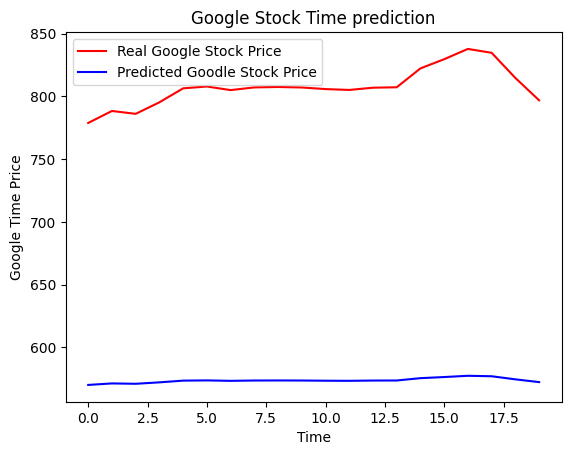

In [12]:
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Goodle Stock Price")
plt.title("Google Stock Time prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend(loc="best")
plt.show()
 

In [13]:
real_stock_price=pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price=real_stock_price.iloc[:,1:2].values


In [14]:
predicted_stock_price_train=regressor.predict(X_train)
predicted_stock_price_train=sc.inverse_transform(predicted_stock_price_train)



40/40 [==============================] - 0s 664us/step


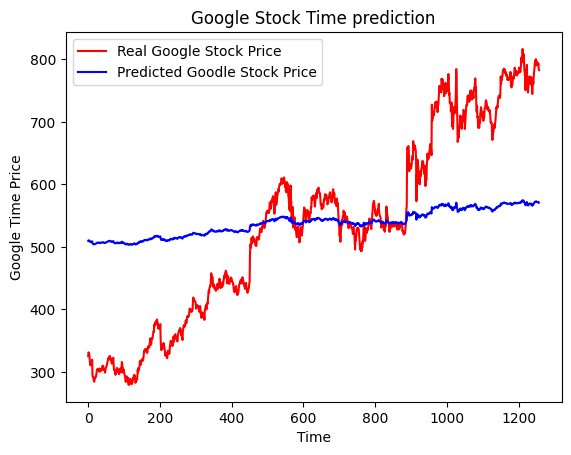

In [15]:
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price_train,color="blue",label="Predicted Goodle Stock Price")
plt.title("Google Stock Time prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend(loc="best")
plt.show()
 

In [16]:
regressor.save("benimmodelim.h5")


In [17]:
new_model=tf.keras.models.load_model("benimmodelim.h5")


In [18]:
predicted_stock_price=new_model.predict(inputs)


1/1 [==============================] - 0s 109ms/step
